# CALORIES CONSUMED DATASET
Using the above dataset to build a Model using Simple Linear Regression the predict the calories consumed. 

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize unhealthy food
* Maximize Exercise activities. 

## CONSTRAINTS
* Work commitments.
* personal commitments. 
* Injuries. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | Weight gained (grams)     | Weight gained by the individual in grams.                                               | Ratio    | Relevant      |
| 2        | Calories Consumed | Calories consumed by the individual  | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass21\calories_consumed.csv")
df=df0.copy()
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(14, 2)

In [4]:
df.dtypes

Weight gained (grams)    int64
Calories Consumed        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Weight gained (grams)    0
Calories Consumed        0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Weight gained (grams)    13
Calories Consumed        13
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

Weight gained (grams)     357.714286
Calories Consumed        2340.714286
dtype: float64

In [11]:
df.median()

Weight gained (grams)     200.0
Calories Consumed        2250.0
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_24364\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[ 200, 1900]], dtype=int64), count=array([[2, 2]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

Weight gained (grams)    111350.681319
Calories Consumed        565668.681319
dtype: float64

In [14]:
df.std()

Weight gained (grams)    333.692495
Calories Consumed        752.109488
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

Weight gained (grams)    1.255737
Calories Consumed        0.654930
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

Weight gained (grams)    0.431272
Calories Consumed       -0.290481
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_24364\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

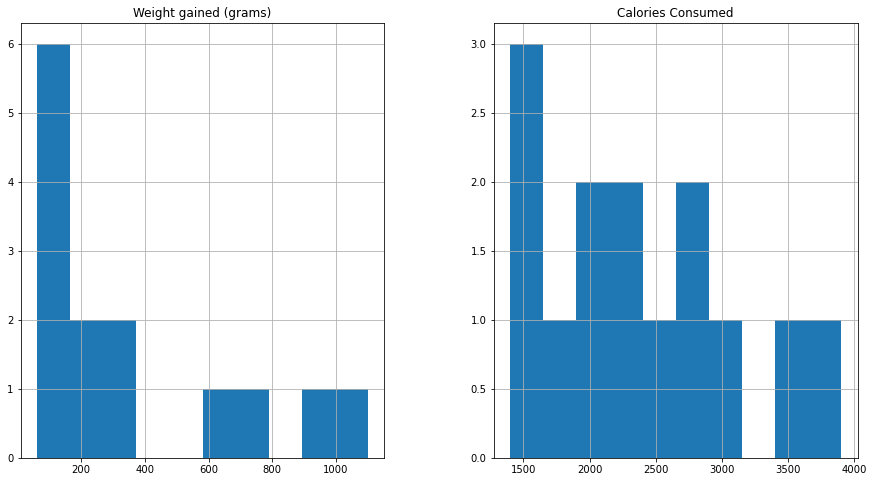

In [17]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


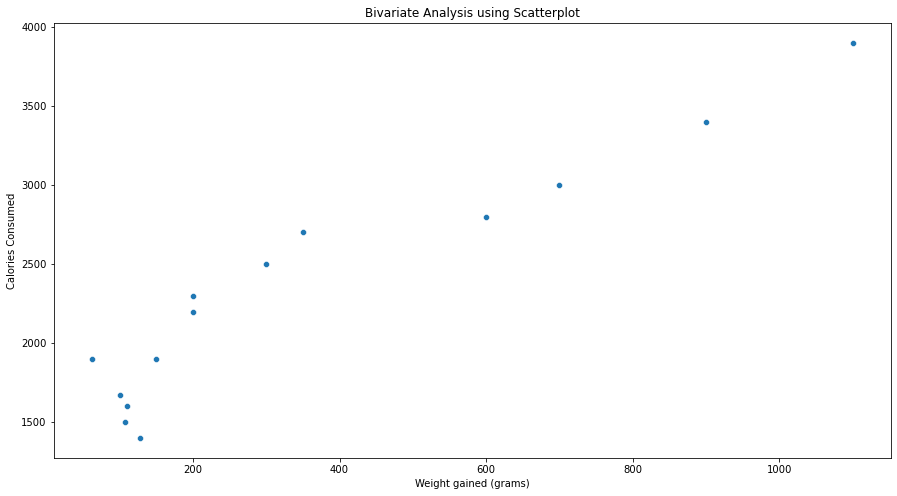

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Weight gained (grams)'],df['Calories Consumed'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [19]:
df.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight gained (grams)'>

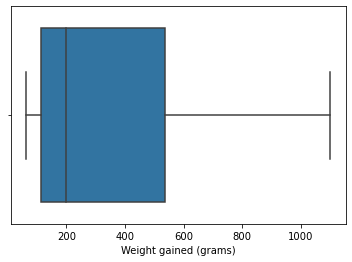

In [20]:
sns.boxplot(df["Weight gained (grams)"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories Consumed'>

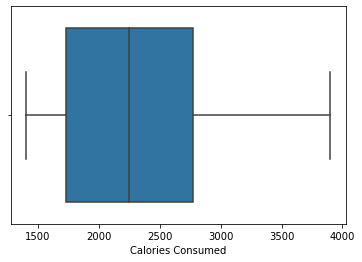

In [21]:
sns.boxplot(df['Calories Consumed'])

from the boxplots it is evident that there are no outliers in both the variables. 

__CORRELATION CHART__

<AxesSubplot:>

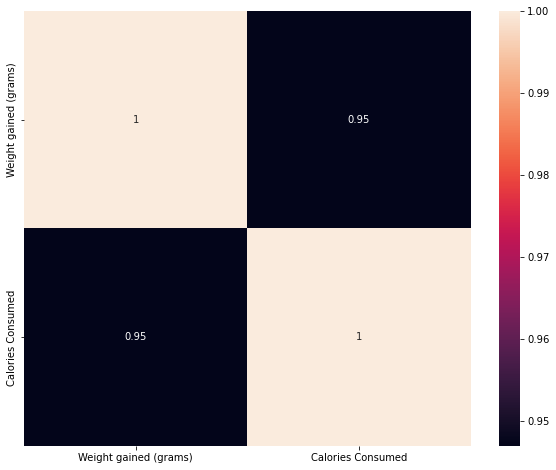

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that the weight gained has a very strong positive correlation with calories consumed as it is greater than 0.85.

In [23]:
cov_output = np.cov(df["Weight gained (grams)"], df['Calories Consumed'])[0, 1]
cov_output

237669.4505494506

A positive covariance indicates that the two variables tend to move together and with the same sign, a negative covariance indicates that the two variables tend to move in the opposite direction.<br>
__From the covariance value we can infer that the variables move in the same direction.__

#### EVALUATING DIFFERENT  MODELS FOR  MODEL BUILDING

Importing the library required for evaluating the models. 

In [24]:
import statsmodels.formula.api as smf

__Simple Linear Regression__

Fitting the model

In [25]:
model1 = smf.ols("df['Calories Consumed'] ~ df['Weight gained (grams)']", data = df).fit()
model1.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     df['Calories Consumed']   R-squared:                       0.897
Model:                                 OLS   Adj. R-squared:                  0.888
Method:                      Least Squares   F-statistic:                     104.3
Date:                     Fri, 04 Nov 2022   Prob (F-statistic):           2.86e-07
Time:                             01:08:52   Log-Likelihood:                -96.170
No. Observations:                       14   AIC:                             196.3
Df Residuals:                           12   BIC:                             197.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1577.2007    100.541     15.687      0.000    1358.141    1796.260
df['Weight gained (grams)']     2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization to see how well the model fit the data.

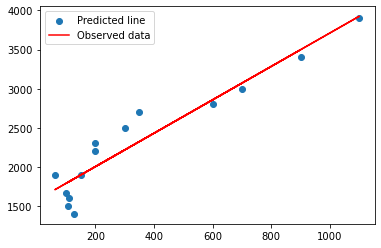

In [26]:
pred1 = model1.predict(pd.DataFrame(df['Weight gained (grams)']))

# Regression Line
plt.scatter(df['Weight gained (grams)'], df['Calories Consumed'])
plt.plot(df['Weight gained (grams)'], pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [27]:
res1 = df['Calories Consumed'] - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

232.8335007096089

__Model building on Transformed Data__<br>
* __Log Transformation__

Plotting the scatter plot to understand the correlation and regression line between the transformed variables. 

array([[1.        , 0.93680369],
       [0.93680369, 1.        ]])

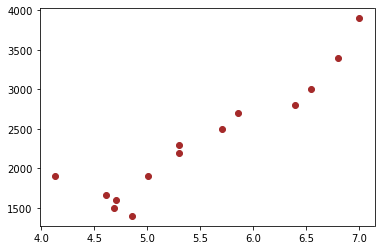

In [28]:
plt.scatter(x = np.log(df['Weight gained (grams)']), y = df['Calories Consumed'], color = 'brown')
np.corrcoef(np.log(df['Weight gained (grams)']), df['Calories Consumed']) #correlation

Fitting the model on the regression line

In [29]:
model2 = smf.ols("df['Calories Consumed'] ~ np.log(df['Weight gained (grams)'])", data = df).fit()
model2.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     df['Calories Consumed']   R-squared:                       0.878
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                     86.04
Date:                     Fri, 04 Nov 2022   Prob (F-statistic):           8.02e-07
Time:                             01:08:56   Log-Likelihood:                -97.363
No. Observations:                       14   AIC:                             198.7
Df Residuals:                           12   BIC:                             200.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(df['Weight gained (grams)'])   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   3.009
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization to see how well the model fit the data. 

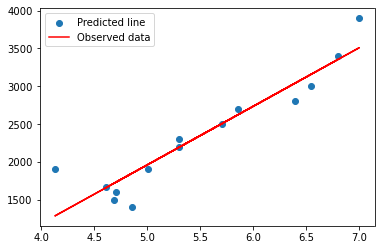

In [30]:
pred2 = model2.predict(pd.DataFrame(df['Weight gained (grams)']))

# Regression Line
plt.scatter(np.log(df['Weight gained (grams)']), df['Calories Consumed'])
plt.plot(np.log(df['Weight gained (grams)']), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [31]:
res2 = df['Calories Consumed'] - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

253.55804039366257

* __Exponential transformation__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[1.        , 0.89872528],
       [0.89872528, 1.        ]])

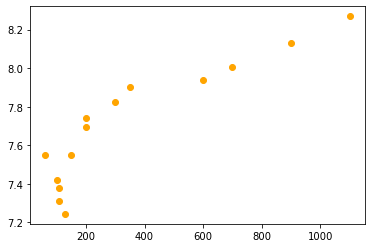

In [32]:
plt.scatter(x = df['Weight gained (grams)'], y = np.log(df['Calories Consumed']), color = 'orange')
np.corrcoef(df['Weight gained (grams)'], np.log(df['Calories Consumed'])) #correlation

Fitting the model on the regression line

In [33]:
model3 = smf.ols("np.log(df['Calories Consumed']) ~ df['Weight gained (grams)']", data = df).fit()
model3.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     np.log(df['Calories Consumed'])   R-squared:                       0.808
Model:                                         OLS   Adj. R-squared:                  0.792
Method:                              Least Squares   F-statistic:                     50.40
Date:                             Fri, 04 Nov 2022   Prob (F-statistic):           1.25e-05
Time:                                     01:09:01   Log-Likelihood:                 8.3130
No. Observations:                               14   AIC:                            -12.63
Df Residuals:                                   12   BIC:                            -11.35
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.4068      0.058    128.367      0.000       7.281       7.533
df['Weight gained (grams)']     0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred3 = model3.predict(pd.DataFrame(df['Weight gained (grams)']))
pred3_at = np.exp(pred3)

Visualization to see how well the model fit the data.

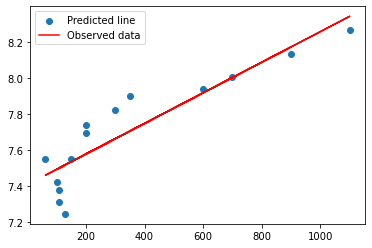

In [35]:
# Regression Line
plt.scatter(df['Weight gained (grams)'], np.log(df['Calories Consumed']))
plt.plot(df['Weight gained (grams)'], pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [36]:
res3 = df['Calories Consumed'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

272.4207117048493

* __Polynomial transformation__

Fitting the model on the regression line

In [37]:
model4 = smf.ols("np.log(df['Calories Consumed']) ~ df['Weight gained (grams)'] + I(df['Weight gained (grams)']*df['Weight gained (grams)'])", data = df).fit()
model4.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     np.log(df['Calories Consumed'])   R-squared:                       0.852
Model:                                         OLS   Adj. R-squared:                  0.825
Method:                              Least Squares   F-statistic:                     31.55
Date:                             Fri, 04 Nov 2022   Prob (F-statistic):           2.78e-05
Time:                                     01:09:04   Log-Likelihood:                 10.125
No. Observations:                               14   AIC:                            -14.25
Df Residuals:                                   11   BIC:                            -12.33
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        7.2892      0.084     86.724      0.000       7.104       7.474
df['Weight gained (grams)']                                      0.0017      0.000      3.560      0.004       0.001       0.003
I(df['Weight gained (grams)'] * df['Weight gained (grams)']) -7.689e-07   4.27e-07     -1.803      0.099   -1.71e-06     1.7e-07
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.721
Skew:                          -0.394   Prob(JB):                        0.697
Kurtosis:                       2.217   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)

Visualization to see how well the model fit the data.

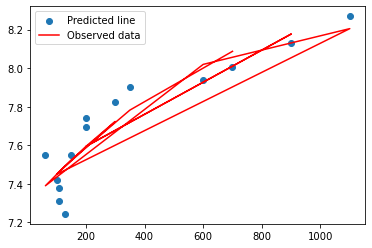

In [39]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = df.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(df['Weight gained (grams)'], np.log(df['Calories Consumed']))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [40]:
res4 = df['Calories Consumed']- pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

240.82777570404062

                   ** COMPARING THE IMPORTANT VALUES FOR ALL THE DIFFERENT MODELS TO SELECT THE BEST MODEL **

|               **OUTPUT**               |               **INPUT**              | **R VALUE** | **R^2 VALUE** | **RMSE VALUE** |
|:--------------------------------------:|:------------------------------------:|:------------|:-------------:|:--------------:|
| Calories Consumed                      | Weight gained                        | 0.95        | 0.897         | 232.83         |
| Calories Consumed                      | log(Weight gained)                   | 0.937       | 0.878         | 253.55         |
|log(Calories Consumed)                  | Weight gained                        | 0.898       | 0.808         | 272.42         |
|log(Calories Consumed)                  | Weight gained, Weight gained^2       |             | 0.852         | 240.8277       |

From all the different models the first model had the best of all the values so model building will be done using that model. 

### MODEL BUILDING

__Performing Simple Linear Regression__

Equation of linear regression<br>
y=c+m1x1+m2x2+...+mnxn<br>
y is the response<br>
c is the intercept<br>
m1 is the coefficient for the first feature<br>
mn is the coefficient for the nth feature<br>

In our case:<br>
y=c+m1×WG  where WG is Weight Gained (grams)<br>
The m values are called the model coefficients or model parameters.<br>

Assigning the feature variable __'Weight gained (grams)'__ to X variable and the label variable __'Calories Consumed'__ to Y variable. 

In [41]:
X = df["Weight gained (grams)"]
Y = df['Calories Consumed']

Splitting the variables into train and test sets. 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

Importing the library required for building the model. 

In [43]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. And once we've added the constant to our X_train dataset, we can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [45]:
X_train_sm=sm.add_constant(X_train)

In [46]:
model = sm.OLS( Y_train,X_train_sm ).fit()

Performing a summary operation lists out all the different parameters of the regression line fitted

In [47]:
model.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories Consumed   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     53.36
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           0.000162
Time:                        01:11:36   Log-Likelihood:                -61.590
No. Observations:                   9   AIC:                             127.2
Df Residuals:                       7   BIC:                             127.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1523.9811    132.653     11.488      0.000    1210.307    1837.656
Weight gained (grams)     2.1479      0.294      7.305      0.000       1.453       2.843
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.368
Skew:                          -0.143   Prob(JB):                        0.832
Kurtosis:                       2.051   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at some key statistics from the summary

The values we are concerned with are -<br>

* __R-squared__<br>
    R-squared value is 0.884. This shows that 88.4% of the variance in the weight can be explained by height.<br>
* __F statistic  p value and its significance__<br>
    F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.<br>
* __The coefficients and significance (p-values)__<br>
    The coefficient for weight gained is 2.15 and P-value is close to 0. This shows that the coefficient is statistically significant.<br>

The fit is significant.<br>
From the parameters that we get, our linear regression equation becomes:<br>

#### Calories consumed=1523.98+ 2.15×Weight Gained

Let's visualize how well the model fit the data.

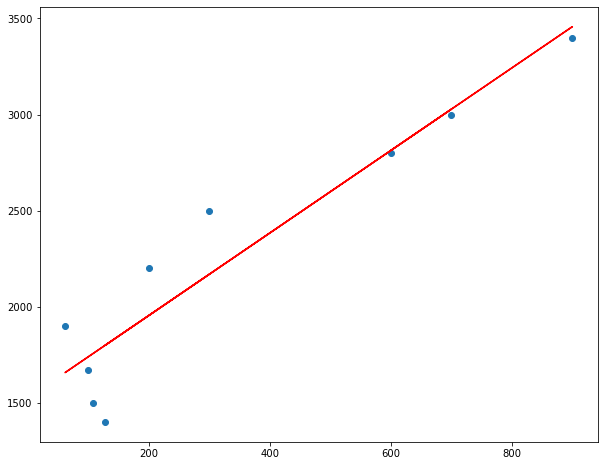

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(X_train, Y_train)
plt.plot(X_train, 1523.9811 + 2.1479*X_train, 'r')
plt.show()

In order to have an intercept, we need to manually use the add_constant attribute of statsmodels

In [49]:
X_test_sm=sm.add_constant(X_test)

Predicting the dependent variable of the test dataset. 

In [51]:
Y_test_pred=model.predict(X_test_sm)

Importing the required libraries to calculate the RMSE value and R^2 value. 

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Returns the mean squared error; we'll take a square root to get the RMSE value

In [53]:
np.sqrt(mean_squared_error(Y_test, Y_test_pred))

256.4256590928381

finding the r^2 value of the test dataset. 

In [55]:
r_squared = r2_score(Y_test, Y_test_pred)
r_squared

0.8975154011203298

Evaluating the train dataset by predicting to get the RMSE value for the dataset. 

In [56]:
Y_train_pred=model.predict(X_train_sm)

In [57]:
np.sqrt(mean_squared_error(Y_train, Y_train_pred))

226.8748997542767

In [58]:
r_squared = r2_score(Y_train, Y_train_pred)
r_squared

0.884036752466552

### CONCLUSION

From all the models, the simple linear regression model is best model as it has comparatively best r-square value and r value. 